# Data wrangling for SolarPowerCompany Capstone

In [1]:
#Importing necessary packages
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [2]:
#Loading all data from website: https://opendata.edp.com/explore/?refine.keyword=visible&sort=modified
#Note: export files from: https://opendata.edp.com/explore/dataset/htw-failures-2016/export/

table_names = ['faro_meteo_2014','faro_meteo_2015','faro_meteo_2016','sunlab-faro-pv-2014','sunlab-faro-pv-2015','sunlab-faro-pv-2016']
subset = ['faro_meteo_2015','sunlab-faro-pv-2015']

In [3]:
df = pd.read_csv('https://opendata.edp.com/explore/dataset/sunlab-faro-pv-2015/download/?format=csv&timezone=GMT&lang=en&use_labels_for_header=true&csv_separator=%3B', sep=';')

In [4]:
df.head()

,Datetime,A_Vertical - Voltage DC [V],A_Vertical - Current DC [A],A_Vertical - Power DC [W],A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Horizontal - Voltage DC [V],A_Horizontal - Current DC [A],A_Horizontal - Power DC [W],...,B_Vertical - Power DC [W],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Horizontal - Voltage DC [V],B_Horizontal - Current DC [A],B_Horizontal - Power DC [W],B_Vertical - Temperature [ºC],B_Optimal - Temperature [ºC],B_Horizontal - Temperature [ºC]
0,2015-01-31T08:57:00+00:00,18.90,0.215,4.06350,26.95,0.3850,10.37575,14.70,0.4200,6.174000,...,3.884750,19.85,0.3800,7.543000,14.80,0.4175,6.179000,16.1,15.6,15.7
1,2015-07-26T11:01:00+00:00,27.65,2.610,72.16650,26.70,6.6850,178.48950,26.55,6.5825,174.765375,...,71.599375,26.55,6.6500,176.557500,26.55,6.5575,174.101625,34.9,43.4,41.5
2,2015-01-31T08:59:00+00:00,18.90,0.200,3.78000,27.20,0.2725,7.41200,14.70,0.3150,4.630500,...,3.610000,19.50,0.2725,5.313750,14.90,0.3125,4.656250,15.9,15.6,15.6
3,2015-01-31T09:09:00+00:00,31.05,2.150,66.75750,30.40,2.5300,76.91200,29.70,1.6900,50.193000,...,71.289375,29.55,2.5525,75.426375,26.45,1.7075,45.163375,19.5,18.9,17.0
4,2015-07-26T11:10:00+00:00,28.25,2.645,74.72125,26.80,6.7825,181.77100,26.80,6.6300,177.684000,...,73.696250,26.20,6.8750,180.125000,26.75,6.6225,177.151875,34.8,43.0,41.0


In [5]:
df.describe()

,A_Vertical - Voltage DC [V],A_Vertical - Current DC [A],A_Vertical - Power DC [W],A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Horizontal - Voltage DC [V],A_Horizontal - Current DC [A],A_Horizontal - Power DC [W],A_Vertical - Temperature [ºC],...,B_Vertical - Power DC [W],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Horizontal - Voltage DC [V],B_Horizontal - Current DC [A],B_Horizontal - Power DC [W],B_Vertical - Temperature [ºC],B_Optimal - Temperature [ºC],B_Horizontal - Temperature [ºC]
count,234524.000000,234524.000000,234524.000000,237881.000000,237881.000000,237881.000000,237690.000000,237690.000000,237690.000000,242735.000000,...,236427.000000,238970.000000,238970.000000,238970.000000,235746.000000,235746.000000,235746.000000,242735.000000,242735.000000,242735.000000
mean,26.334112,2.215710,62.585480,27.434931,3.719734,103.750133,26.540862,3.219825,88.681944,28.708983,...,63.444210,26.324167,3.707638,101.255219,26.371747,3.198540,88.057110,29.162296,30.540670,28.530540
std,4.432218,1.776805,52.887905,2.177097,2.636596,73.016633,4.169189,2.255425,62.758774,8.208297,...,55.337930,3.607820,2.665199,73.035523,3.905812,2.261612,62.910148,7.563743,9.681179,9.077633
min,10.200000,0.000000,0.000000,10.100000,0.000000,0.000000,10.100000,0.000000,0.000000,1.800000,...,0.000000,10.350000,0.000000,0.000000,11.350000,0.000000,0.000000,3.200000,2.300000,1.600000
25%,26.650000,0.715000,16.110000,26.950000,1.145000,32.232000,26.950000,1.142500,28.938000,22.500000,...,15.126875,26.750000,1.115000,28.196437,26.800000,1.122500,27.101750,23.600000,22.800000,21.500000
50%,28.050000,1.795000,50.255938,27.750000,3.547500,101.427500,27.950000,3.025000,85.497000,29.700000,...,49.320000,27.350000,3.490000,98.325000,27.600000,2.975000,84.942000,30.100000,31.000000,28.700000
75%,29.200000,3.367500,98.415000,28.700000,6.312500,174.998250,28.950000,5.147500,142.608156,35.100000,...,100.246813,28.000000,6.345000,173.052000,28.400000,5.090000,142.964219,35.100000,38.400000,35.500000
max,34.400000,7.997500,236.664000,34.650000,10.237500,307.636875,34.550000,10.237500,304.631875,51.400000,...,243.975000,34.900000,10.237500,302.006250,34.450000,10.237500,300.982500,48.400000,55.500000,53.300000


Data contains 2 different manufactured solar cells, A & B. Angles are vertical, horizontal, and optimal. We will be considering both types of cells and only the optimal angle. 

In [6]:
df.isnull().sum()

Datetime                              0
A_Vertical - Voltage DC [V]        8211
A_Vertical - Current DC [A]        8211
A_Vertical - Power DC [W]          8211
A_Optimal - Voltage DC [V]         4854
A_Optimal - Current DC [A]         4854
A_Optimal - Power DC [W]           4854
A_Horizontal - Voltage DC [V]      5045
A_Horizontal - Current DC [A]      5045
A_Horizontal - Power DC [W]        5045
A_Vertical - Temperature [ºC]         0
A_Optimal - Temperature [ºC]          0
A_Horizontal - Temperature [ºC]       0
B_Vertical - Voltage DC [V]        6308
B_Vertical - Current DC [A]        6308
B_Vertical - Power DC [W]          6308
B_Optimal - Voltage DC [V]         3765
B_Optimal - Current DC [A]         3765
B_Optimal - Power DC [W]           3765
B_Horizontal - Voltage DC [V]      6989
B_Horizontal - Current DC [A]      6989
B_Horizontal - Power DC [W]        6989
B_Vertical - Temperature [ºC]         0
B_Optimal - Temperature [ºC]          0
B_Horizontal - Temperature [ºC]       0


In [7]:
#url1 = 'https://opendata.edp.com/explore/dataset/'
#url2 = '/download/?format=csv&timezone=GMT&lang=en&use_labels_for_header=true&csv_separator=%3B'
#for i in subset:
#    name = 'df_'+i
#    df = pd.read_csv(url1+i+url2,sep=';')
#    globals()[name] = df

In [8]:
df_faro_meteo_2015 = pd.read_csv('https://opendata.edp.com/explore/dataset/faro_meteo_2015/download/?format=csv&timezone=GMT&lang=en&use_labels_for_header=true&csv_separator=%3B', sep=';')

In [9]:
df_faro_meteo_2015.head()

,Datetime,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Precipitation [mm],Atmospheric pressure [hPa]
0,2015-10-29T01:43:00+00:00,14.600000,1.415117,1.644703,0.510503,0.966667,52.816660,NaN,NaN
1,2015-10-29T01:56:00+00:00,14.100000,1.693405,1.639023,0.504588,0.233333,14.492228,NaN,NaN
2,2015-10-29T02:00:00+00:00,14.000000,1.728471,1.653051,0.513537,0.383333,62.996652,NaN,NaN
3,2015-10-29T02:09:00+00:00,13.883334,1.479107,1.651739,0.513191,0.350000,246.320100,NaN,NaN
4,2015-10-29T02:13:00+00:00,13.966668,1.419120,1.643130,0.510884,0.633333,279.500640,NaN,NaN


In [10]:
df_faro_meteo_2015.describe()

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Precipitation [mm],Atmospheric pressure [hPa]
count,4.371590e+05,437159.000000,437159.000000,437159.000000,4.371590e+05,437159.000000,0.0,0.0
mean,-6.843366e+03,244.729887,68.239202,14.912295,-6.860411e+03,213.700388,NaN,NaN
std,3.208382e+06,327.130916,97.823495,19.588676,3.208382e+06,96.168528,NaN,NaN
min,-1.500000e+09,0.750977,1.564069,0.495433,-1.500000e+09,0.000000,NaN,NaN
25%,1.500000e+01,1.574681,1.684743,0.510705,1.016667e+00,128.664450,NaN,NaN
50%,1.930000e+01,18.254152,16.462610,1.865922,1.866667e+00,235.731260,NaN,NaN
75%,2.330000e+01,474.564660,103.692640,27.229151,2.900000e+00,293.577760,NaN,NaN
max,3.716667e+01,1421.328200,720.352560,84.266016,9.700002e+00,359.999800,NaN,NaN


In [11]:
df_faro_meteo_2015.isnull().sum()

Datetime                           0
Ambient Temperature [ºC]           0
Global Radiation [W/m2]            0
Diffuse Radiation [W/m2]           0
Ultraviolet [W/m2]                 0
Wind Velocity [m/s]                0
Wind Direction [º]                 0
Precipitation [mm]            437159
Atmospheric pressure [hPa]    437159
dtype: int64

Precipitation and ATM data are missing.

Reassign names (pv is solar cells and w means weather).

In [12]:
df_pv_2015 = df

In [13]:
df_w_2015 = df_faro_meteo_2015

In [14]:
#Dropping Precip & ATM Data for weather
df_w_2015.drop(['Precipitation [mm]','Atmospheric pressure [hPa]'], axis=1,inplace=True)

In [15]:
df_w_2015.head()

,Datetime,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º]
0,2015-10-29T01:43:00+00:00,14.600000,1.415117,1.644703,0.510503,0.966667,52.816660
1,2015-10-29T01:56:00+00:00,14.100000,1.693405,1.639023,0.504588,0.233333,14.492228
2,2015-10-29T02:00:00+00:00,14.000000,1.728471,1.653051,0.513537,0.383333,62.996652
3,2015-10-29T02:09:00+00:00,13.883334,1.479107,1.651739,0.513191,0.350000,246.320100
4,2015-10-29T02:13:00+00:00,13.966668,1.419120,1.643130,0.510884,0.633333,279.500640


In [16]:
#Dropping vertical and horizontal data form pv
df_pv_2015.drop(list(df.filter(regex = 'Vertical')), axis = 1,inplace=True)
df_pv_2015.drop(list(df.filter(regex = 'Horizontal')), axis = 1,inplace=True)

In [17]:
df_pv_2015.head()

,Datetime,A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Optimal - Temperature [ºC],B_Optimal - Voltage DC [V],B_Optimal - Current DC [A],B_Optimal - Power DC [W],B_Optimal - Temperature [ºC]
0,2015-01-31T08:57:00+00:00,26.95,0.3850,10.37575,14.7,19.85,0.3800,7.543000,15.6
1,2015-07-26T11:01:00+00:00,26.70,6.6850,178.48950,40.6,26.55,6.6500,176.557500,43.4
2,2015-01-31T08:59:00+00:00,27.20,0.2725,7.41200,14.6,19.50,0.2725,5.313750,15.6
3,2015-01-31T09:09:00+00:00,30.40,2.5300,76.91200,17.6,29.55,2.5525,75.426375,18.9
4,2015-07-26T11:10:00+00:00,26.80,6.7825,181.77100,38.6,26.20,6.8750,180.125000,43.0


In [18]:
#Removing optimal from column names
df_pv_2015.columns = df_pv_2015.columns.str.replace('Optimal - ','')
df_pv_2015.head()

,Datetime,A_Voltage DC [V],A_Current DC [A],A_Power DC [W],A_Temperature [ºC],B_Voltage DC [V],B_Current DC [A],B_Power DC [W],B_Temperature [ºC]
0,2015-01-31T08:57:00+00:00,26.95,0.3850,10.37575,14.7,19.85,0.3800,7.543000,15.6
1,2015-07-26T11:01:00+00:00,26.70,6.6850,178.48950,40.6,26.55,6.6500,176.557500,43.4
2,2015-01-31T08:59:00+00:00,27.20,0.2725,7.41200,14.6,19.50,0.2725,5.313750,15.6
3,2015-01-31T09:09:00+00:00,30.40,2.5300,76.91200,17.6,29.55,2.5525,75.426375,18.9
4,2015-07-26T11:10:00+00:00,26.80,6.7825,181.77100,38.6,26.20,6.8750,180.125000,43.0


In [19]:
df_pv_2015.isnull().count(),df_w_2015.isnull().count()

(Datetime              242735
 A_Voltage DC [V]      242735
 A_Current DC [A]      242735
 A_Power DC [W]        242735
 A_Temperature [ºC]    242735
 B_Voltage DC [V]      242735
 B_Current DC [A]      242735
 B_Power DC [W]        242735
 B_Temperature [ºC]    242735
 dtype: int64,
 Datetime                    437159
 Ambient Temperature [ºC]    437159
 Global Radiation [W/m2]     437159
 Diffuse Radiation [W/m2]    437159
 Ultraviolet [W/m2]          437159
 Wind Velocity [m/s]         437159
 Wind Direction [º]          437159
 dtype: int64)

In [20]:
df_pv_2015.dtypes, df_w_2015.dtypes

(Datetime               object
 A_Voltage DC [V]      float64
 A_Current DC [A]      float64
 A_Power DC [W]        float64
 A_Temperature [ºC]    float64
 B_Voltage DC [V]      float64
 B_Current DC [A]      float64
 B_Power DC [W]        float64
 B_Temperature [ºC]    float64
 dtype: object,
 Datetime                     object
 Ambient Temperature [ºC]    float64
 Global Radiation [W/m2]     float64
 Diffuse Radiation [W/m2]    float64
 Ultraviolet [W/m2]          float64
 Wind Velocity [m/s]         float64
 Wind Direction [º]          float64
 dtype: object)

In [21]:
#Converting Datetime columns to datetime objects
df_pv_2015['Datetime'] = pd.to_datetime(df_pv_2015['Datetime'])
df_w_2015['Datetime'] = pd.to_datetime(df_w_2015['Datetime'])

In [22]:
df_pv_2015.dtypes, df_w_2015.dtypes

(Datetime              datetime64[ns, UTC]
 A_Voltage DC [V]                  float64
 A_Current DC [A]                  float64
 A_Power DC [W]                    float64
 A_Temperature [ºC]                float64
 B_Voltage DC [V]                  float64
 B_Current DC [A]                  float64
 B_Power DC [W]                    float64
 B_Temperature [ºC]                float64
 dtype: object,
 Datetime                    datetime64[ns, UTC]
 Ambient Temperature [ºC]                float64
 Global Radiation [W/m2]                 float64
 Diffuse Radiation [W/m2]                float64
 Ultraviolet [W/m2]                      float64
 Wind Velocity [m/s]                     float64
 Wind Direction [º]                      float64
 dtype: object)

In [23]:
df_pv_2015.Datetime.min(), df_pv_2015.Datetime.max()

(Timestamp('2015-01-01 07:40:00+0000', tz='UTC'),
 Timestamp('2015-11-30 17:22:00+0000', tz='UTC'))

In [24]:
df_w_2015.Datetime.min(), df_w_2015.Datetime.max()

(Timestamp('2015-01-01 00:00:00+0000', tz='UTC'),
 Timestamp('2015-10-31 23:00:00+0000', tz='UTC'))

Note that date ranges do not match up perfectly. Now plot columns to check for anamolies. 

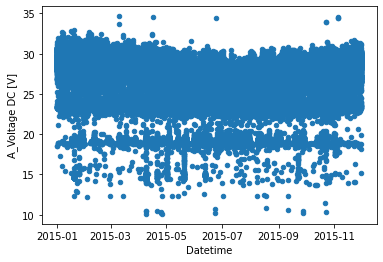

In [25]:
df_pv_2015.plot.scatter(x='Datetime', y = 'A_Voltage DC [V]')

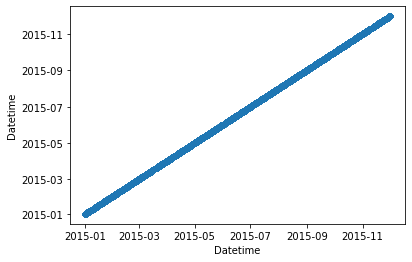

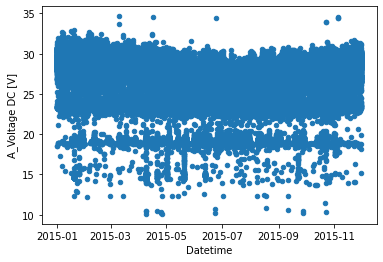

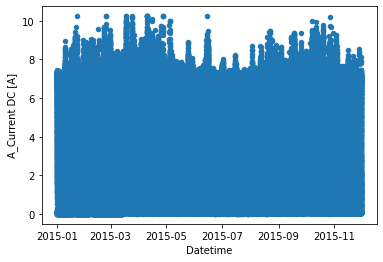

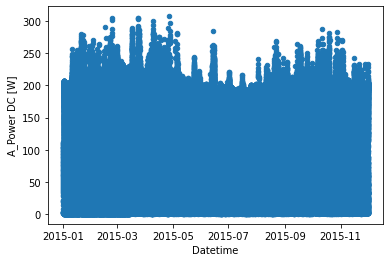

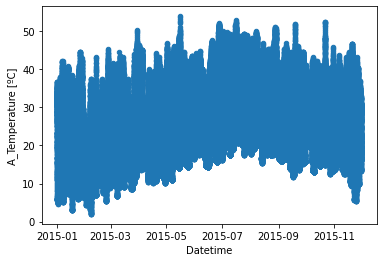

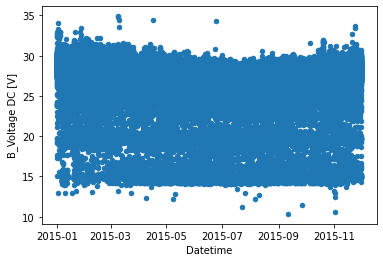

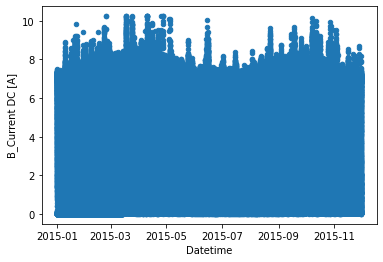

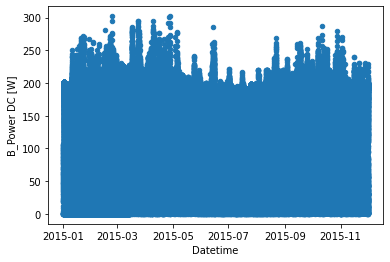

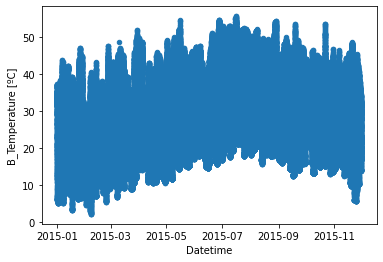

In [26]:
for i in df_pv_2015.columns:
    df_pv_2015.plot.scatter(x='Datetime', y = i)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124365730>,
      dtype=object)

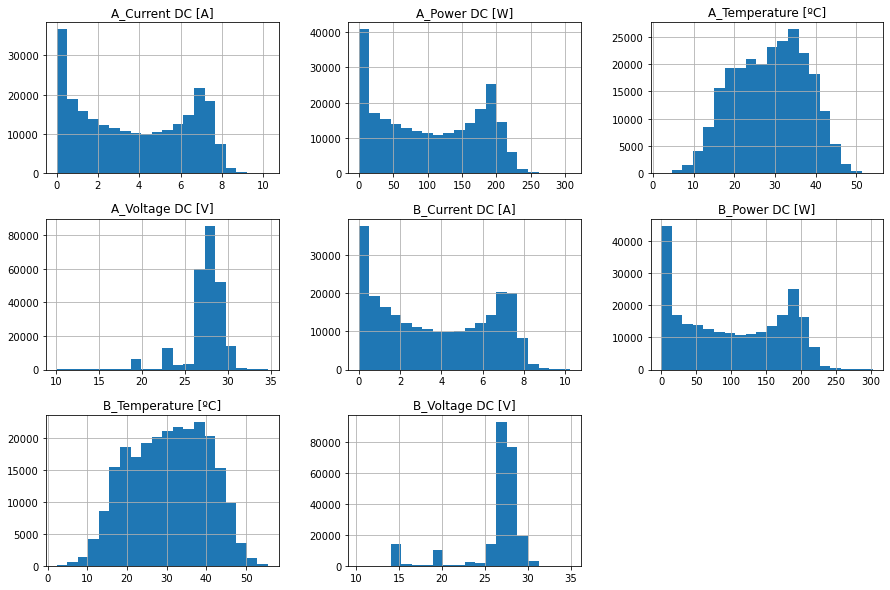

In [27]:
df_pv_2015.hist(bins=20,figsize=(15,10))

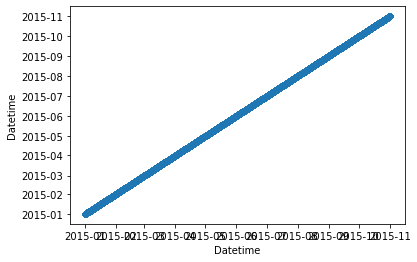

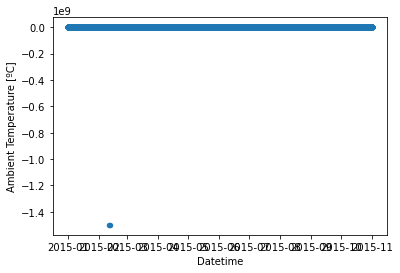

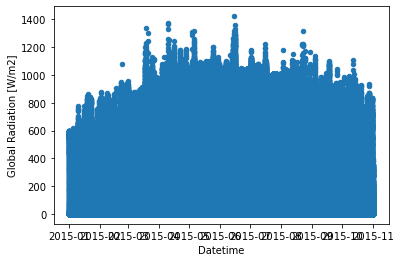

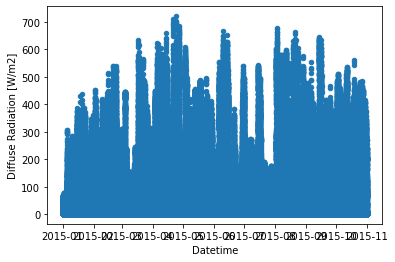

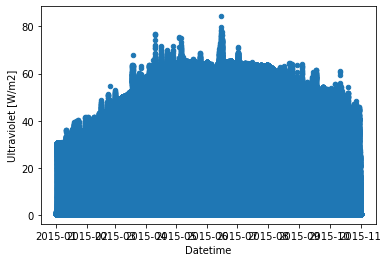

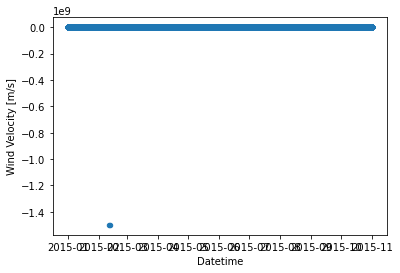

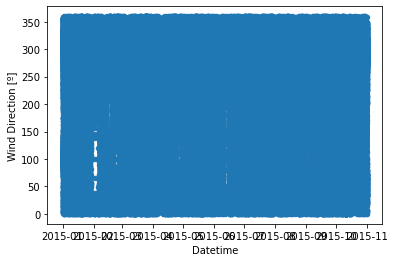

In [28]:
for i in df_w_2015.columns:
    df_w_2015.plot.scatter(x='Datetime', y = i)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13176df70>,
      dtype=object)

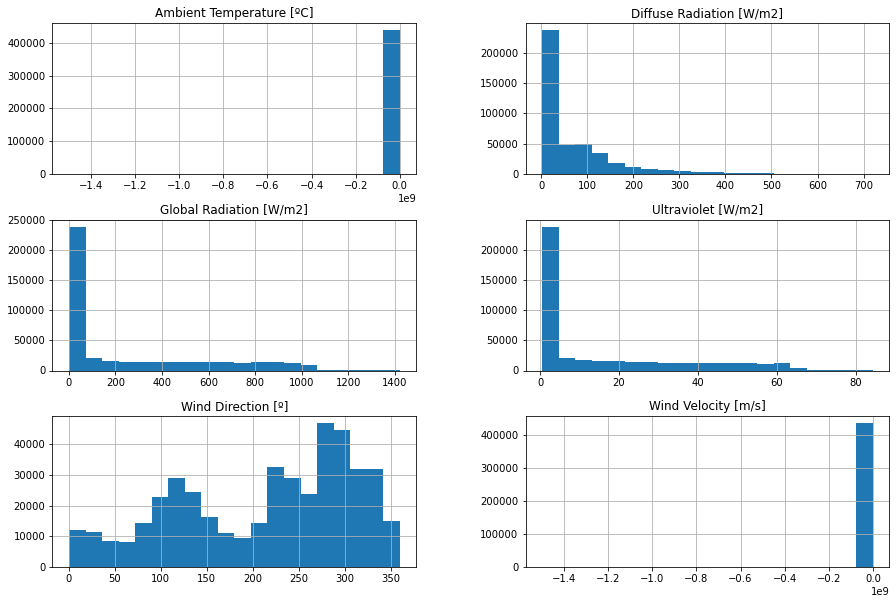

In [29]:
df_w_2015.hist(bins=20,figsize=(15,10))

In [30]:
df_w_2015.head()

,Datetime,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º]
0,2015-10-29 01:43:00+00:00,14.600000,1.415117,1.644703,0.510503,0.966667,52.816660
1,2015-10-29 01:56:00+00:00,14.100000,1.693405,1.639023,0.504588,0.233333,14.492228
2,2015-10-29 02:00:00+00:00,14.000000,1.728471,1.653051,0.513537,0.383333,62.996652
3,2015-10-29 02:09:00+00:00,13.883334,1.479107,1.651739,0.513191,0.350000,246.320100
4,2015-10-29 02:13:00+00:00,13.966668,1.419120,1.643130,0.510884,0.633333,279.500640


In [31]:
df_w_2015['Ambient Temperature [ºC]'].describe(),df_w_2015['Wind Velocity [m/s]'].describe()

(count    4.371590e+05
 mean    -6.843366e+03
 std      3.208382e+06
 min     -1.500000e+09
 25%      1.500000e+01
 50%      1.930000e+01
 75%      2.330000e+01
 max      3.716667e+01
 Name: Ambient Temperature [ºC], dtype: float64,
 count    4.371590e+05
 mean    -6.860411e+03
 std      3.208382e+06
 min     -1.500000e+09
 25%      1.016667e+00
 50%      1.866667e+00
 75%      2.900000e+00
 max      9.700002e+00
 Name: Wind Velocity [m/s], dtype: float64)

Locate rows where Ambient Tempt and Wind Velocity have outlier -1.500000e+09 and then remove them. 

In [32]:
df_w_2015.loc[df_w_2015['Ambient Temperature [ºC]'] == -1.500000e+09]

,Datetime,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º]
52588,2015-02-10 20:11:00+00:00,-1.500000e+09,3.830472,3.471248,0.512003,-1.500000e+09,276.36396
111150,2015-02-12 08:05:00+00:00,-1.500000e+09,25.927230,25.650498,4.161949,-1.500000e+09,273.36688


In [33]:
df_w_2015.loc[df_w_2015['Wind Velocity [m/s]'] == -1.500000e+09]

,Datetime,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º]
52588,2015-02-10 20:11:00+00:00,-1.500000e+09,3.830472,3.471248,0.512003,-1.500000e+09,276.36396
111150,2015-02-12 08:05:00+00:00,-1.500000e+09,25.927230,25.650498,4.161949,-1.500000e+09,273.36688


In [34]:
df_w_2015 = df_w_2015.loc[df_w_2015['Wind Velocity [m/s]'] != -1.500000e+09]

In [35]:
df_w_2015.loc[df_w_2015['Wind Velocity [m/s]'] == -1.500000e+09]

,Datetime,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º]


In [36]:
df_w_2015.loc[df_w_2015['Ambient Temperature [ºC]'] == -1.500000e+09]

,Datetime,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º]


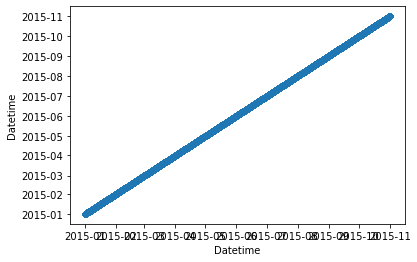

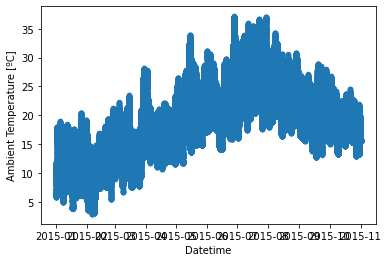

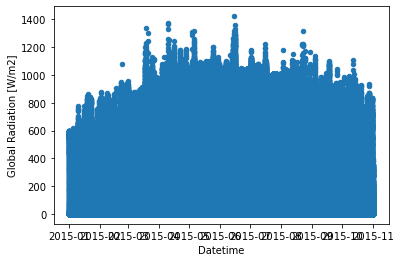

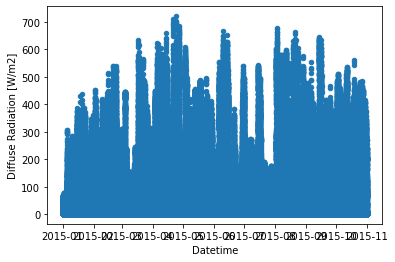

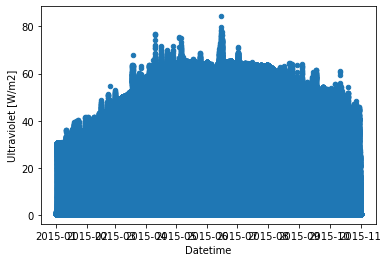

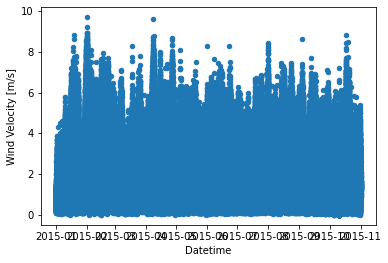

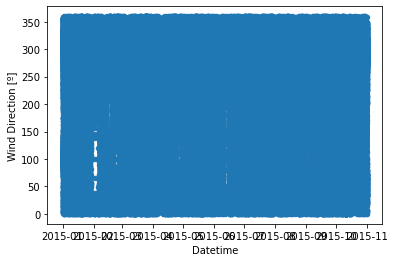

In [37]:
for i in df_w_2015.columns:
    df_w_2015.plot.scatter(x='Datetime', y = i)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12fbafeb0>,
      dtype=object)

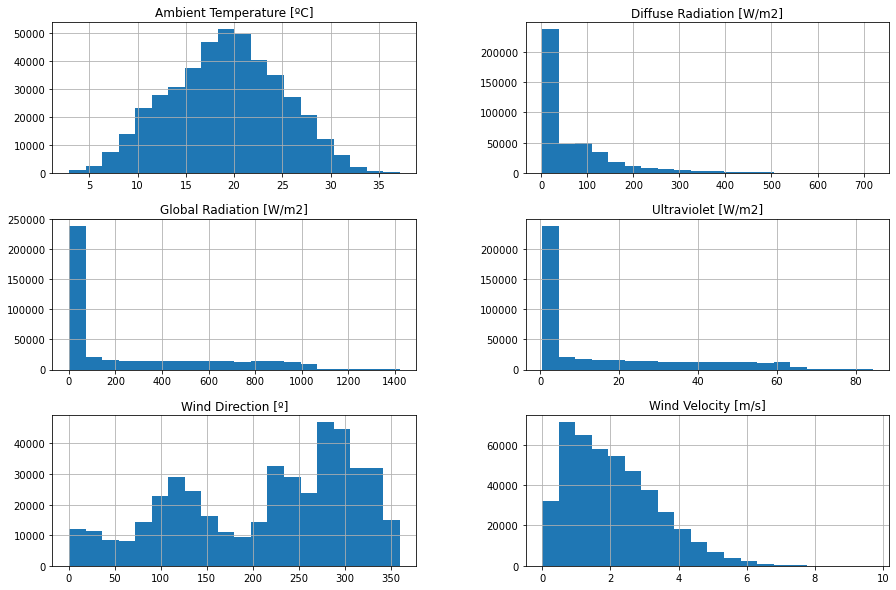

In [38]:
df_w_2015.hist(bins=20,figsize=(15,10))

Now we're going to look at 1 week of values to figure out the best way to group the data. 

In [39]:
mask_week = (df_w_2015['Datetime'] >='2015-03-15') & (df_w_2015['Datetime'] <='2015-03-21')

In [40]:
df_w_week = df_w_2015.loc[mask_week]

In [41]:
df_w_week.describe()

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º]
count,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000
mean,12.711363,176.103729,71.701682,11.150339,1.816460,184.772923
std,2.173476,277.664740,109.216721,16.143430,1.113208,102.634725
min,7.500000,0.925354,1.602942,0.499304,0.066667,0.256097
25%,11.200000,1.577627,1.656422,0.510477,0.866667,91.846592
50%,12.500000,4.713674,4.400324,0.756590,1.650000,178.322360
75%,14.166668,243.729820,98.271112,17.703890,2.533334,281.333340
max,17.966668,1338.782800,632.937240,67.706288,8.283333,359.999800


In [42]:
df_w_week.nunique()

Datetime                    8641
Ambient Temperature [ºC]     716
Global Radiation [W/m2]     8630
Diffuse Radiation [W/m2]    8502
Ultraviolet [W/m2]          6957
Wind Velocity [m/s]          407
Wind Direction [º]          8627
dtype: int64

In [43]:
df_w_week.isnull().sum()

Datetime                    0
Ambient Temperature [ºC]    0
Global Radiation [W/m2]     0
Diffuse Radiation [W/m2]    0
Ultraviolet [W/m2]          0
Wind Velocity [m/s]         0
Wind Direction [º]          0
dtype: int64

In [44]:
df_w_week = df_w_week.sort_values('Datetime').reset_index()

In [45]:
df_w_week.head()

,index,Datetime,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º]
0,165756,2015-03-15 00:00:00+00:00,12.500000,1.566362,1.649270,0.509249,1.466667,323.64562
1,251778,2015-03-15 00:01:00+00:00,12.500000,1.278880,1.632248,0.508144,1.633333,332.50000
2,59893,2015-03-15 00:02:00+00:00,12.500000,1.562952,1.624753,0.507149,1.800000,324.01902
3,197430,2015-03-15 00:03:00+00:00,12.500000,1.549573,1.618642,0.506846,1.716667,328.00016
4,383168,2015-03-15 00:04:00+00:00,12.400002,1.886481,1.824666,0.509950,1.600000,326.49572


Plot to see progression

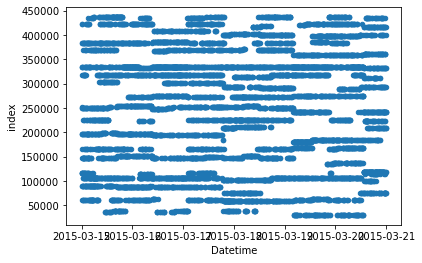

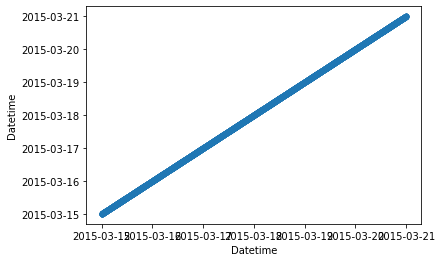

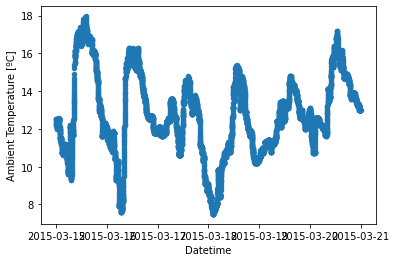

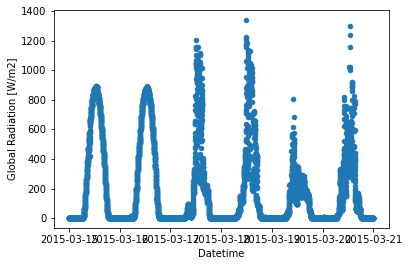

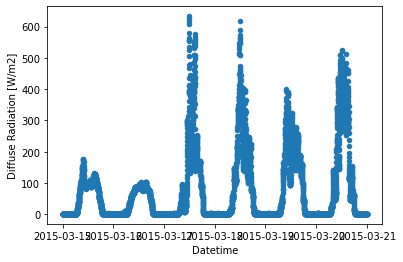

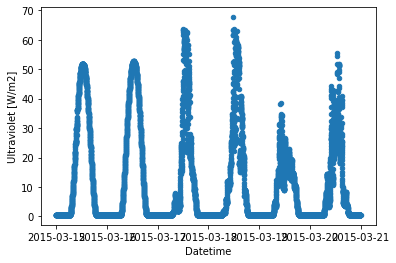

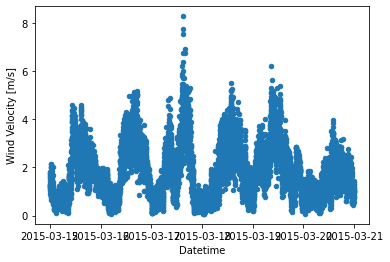

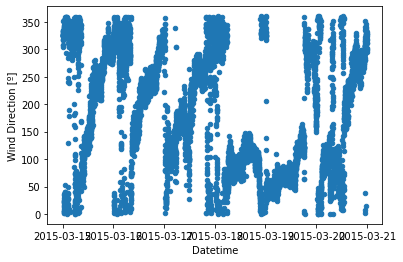

In [46]:
for i in df_w_week.columns:
    df_w_week.plot.scatter(x='Datetime', y = i)

Let's do one day just to see.

In [47]:
mask_day = (df_w_2015['Datetime'] >='2015-03-16') & (df_w_2015['Datetime'] <'2015-03-17')

In [48]:
df_d_day = df_w_2015.loc[mask_day]

In [50]:
df_d_day = df_d_day.sort_values('Datetime').reset_index()

In [51]:
df_d_day.head()

,index,Datetime,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º]
0,334269,2015-03-16 00:00:00+00:00,12.0,1.452431,1.660005,0.505351,1.233334,318.76380
1,150875,2015-03-16 00:01:00+00:00,12.0,1.353939,1.651793,0.504654,1.566667,322.85864
2,88522,2015-03-16 00:02:00+00:00,12.0,1.527780,1.652865,0.505048,1.250000,321.59742
3,88524,2015-03-16 00:03:00+00:00,12.0,1.457384,1.652983,0.507355,1.450000,320.87686
4,421734,2015-03-16 00:04:00+00:00,12.0,1.470337,1.677870,0.510459,1.133333,321.88202


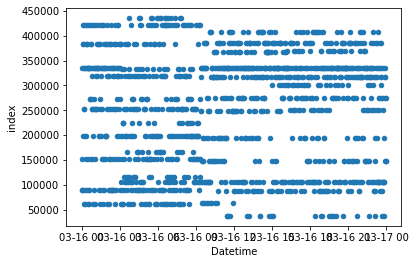

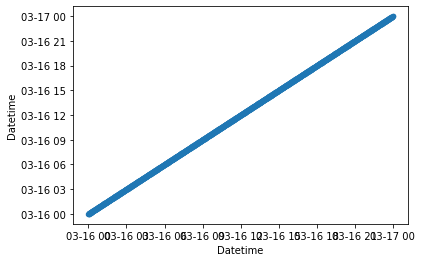

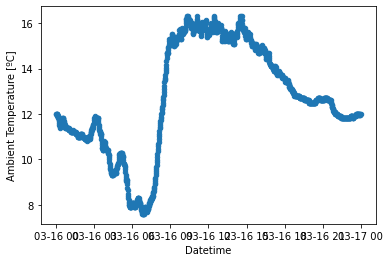

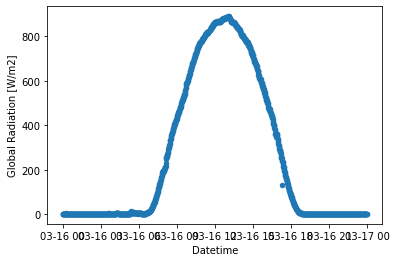

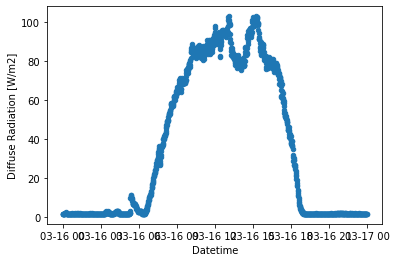

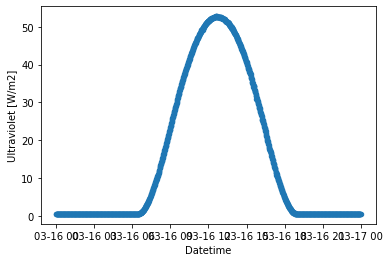

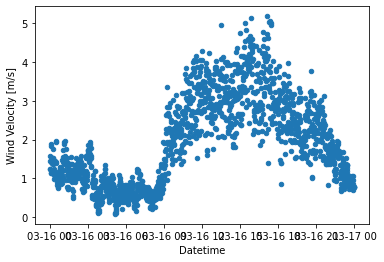

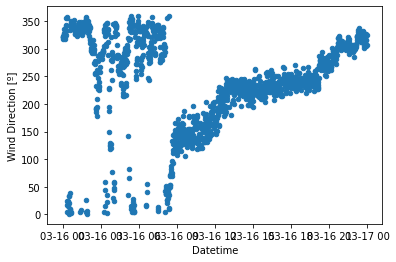

In [52]:
for i in df_d_day.columns:
    df_d_day.plot.scatter(x='Datetime', y = i)

In [53]:
df_d_day.describe()

,index,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º]
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,251957.685417,12.729422,262.826393,35.866031,15.282087,1.960151,238.587273
std,113378.141674,2.419860,333.610077,38.127017,19.368432,1.138751,81.276619
min,37174.000000,7.600000,0.952320,1.602942,0.501071,0.083333,0.763049
25%,147947.500000,11.200000,1.592604,1.662290,0.510210,0.933333,206.049485
50%,275207.500000,12.600000,9.021031,8.423341,0.846571,1.833333,241.805530
75%,334484.250000,15.200000,579.015070,78.675580,32.740367,2.833333,302.878280
max,435301.000000,16.300002,890.766080,103.072240,52.761428,5.183334,359.282240


Leaning towards grouping by $\frac{1}{3}$ or $\frac{1}{4}$ days. Will make final decision after next section when looking at correlations. 

Given the day scatter plots, missing values will be replaced with a forward fill; however, an average between rows would be better if I an figure out how to do it. Also, I will eliminate the index column as new indices have been assigned so we have chronological order. 

In [54]:
df_pv_2015.isnull().sum()

Datetime                 0
A_Voltage DC [V]      4854
A_Current DC [A]      4854
A_Power DC [W]        4854
A_Temperature [ºC]       0
B_Voltage DC [V]      3765
B_Current DC [A]      3765
B_Power DC [W]        3765
B_Temperature [ºC]       0
dtype: int64

In [58]:
df_pv_2015.fillna(method='ffill', inplace=True)

In [59]:
#Weather df does not need it. 
df_w_2015.isnull().sum()

Datetime                    0
Ambient Temperature [ºC]    0
Global Radiation [W/m2]     0
Diffuse Radiation [W/m2]    0
Ultraviolet [W/m2]          0
Wind Velocity [m/s]         0
Wind Direction [º]          0
dtype: int64

In [65]:
#Saving dataframes as pickle files on local directory
df_pv_2015.to_pickle('./pv_2015.pkl')
df_w_2015.to_pickle('./w_2015.pkl')